# Data visualization

#dataviz #datavisualization #codanics

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [2]:
# importing titanic dataset from seaborn
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='fare'>

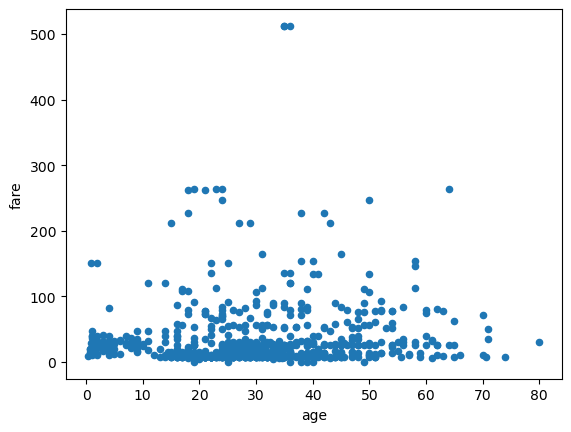

In [4]:
# making visualization from pandas
df.plot(kind='scatter', x ='age', y ='fare')

<Axes: xlabel='age', ylabel='fare'>

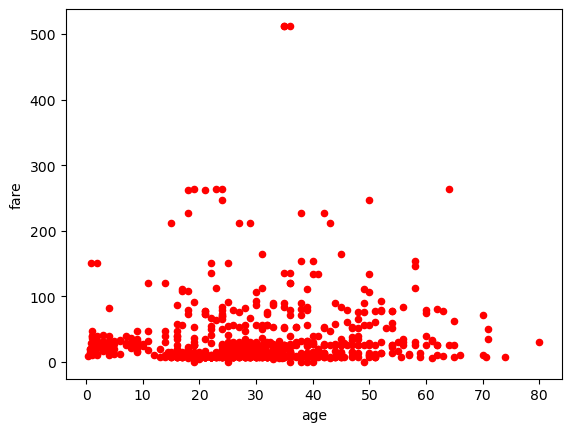

In [5]:
# visulization through pandas with color
df.plot(kind='scatter', x ='age', y ='fare', color='red')

<Axes: xlabel='age', ylabel='fare'>

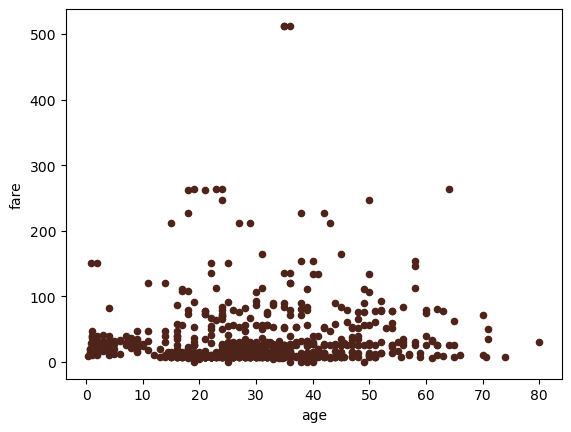

In [6]:
# color using hex code
df.plot(kind='scatter', x = 'age', y = 'fare', color='#4E2319')

### Use color pallette for color differentition
### Use colors that can be seen by color blinds
### Use color picker extension to pick colors

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


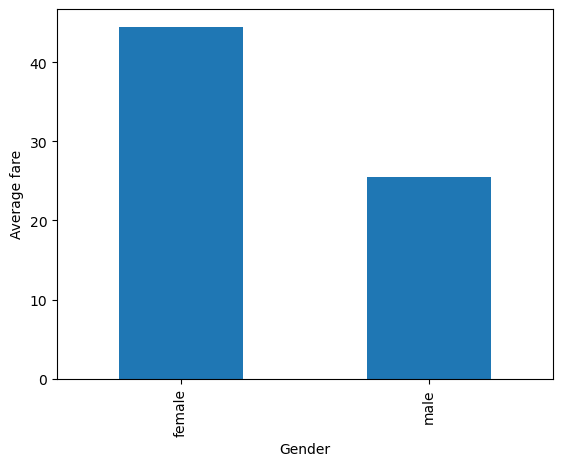

In [8]:
df.groupby('sex')['fare'].mean().plot(kind='bar')  # using simple bar plot by pandas
plt.ylabel('Average fare')
plt.xlabel('Gender')
plt.show()

### Seaborn visualization

#### When bar plot comes to mind
- X axis category
- Y axis numeric

<Axes: xlabel='survived', ylabel='fare'>

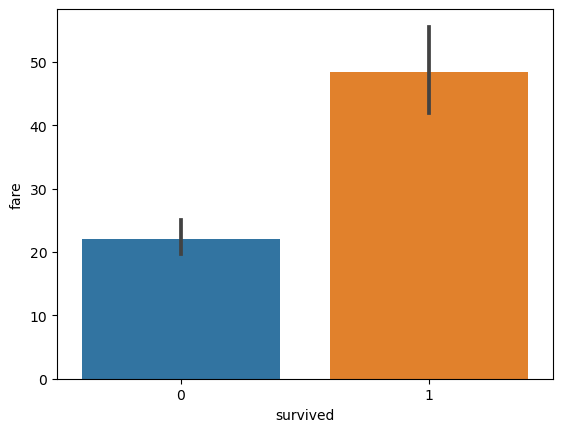

In [9]:
# survived(category) and fare(numeric)
sns.barplot(data = df, x ='survived', y ='fare')

#### By adding simple 'Hue' command we can add other category for x axis

<Axes: xlabel='survived', ylabel='fare'>

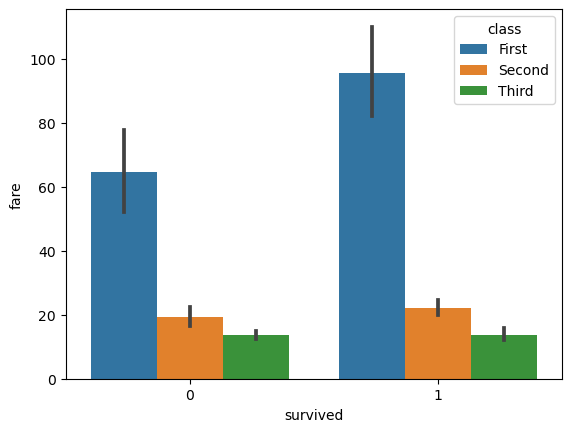

In [10]:
sns.barplot(data = df, x = 'survived', y = 'fare', hue='class')

### scatter plot
- We can make scatter plot but both axis needs to be numeric

<Axes: xlabel='age', ylabel='fare'>

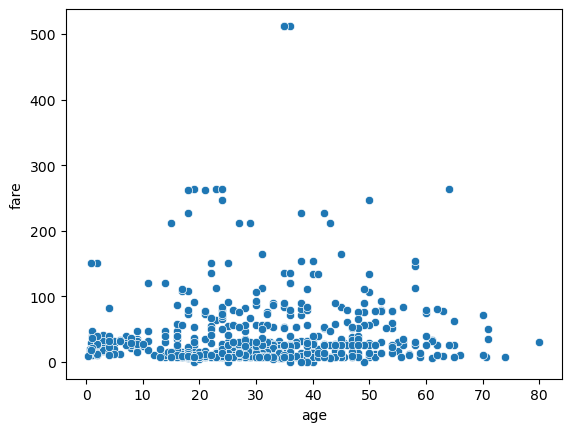

In [11]:
sns.scatterplot(data = df, x = 'age', y = 'fare')

### We can add hue in scatter plot like:

<Axes: xlabel='age', ylabel='fare'>

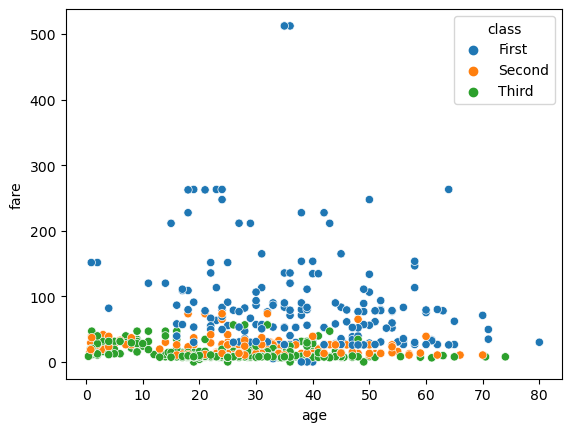

In [12]:
sns.scatterplot(data=df, x='age', y='fare', hue='class')

## We created hypothesis that the top payers were of which gender?

<Axes: xlabel='age', ylabel='fare'>

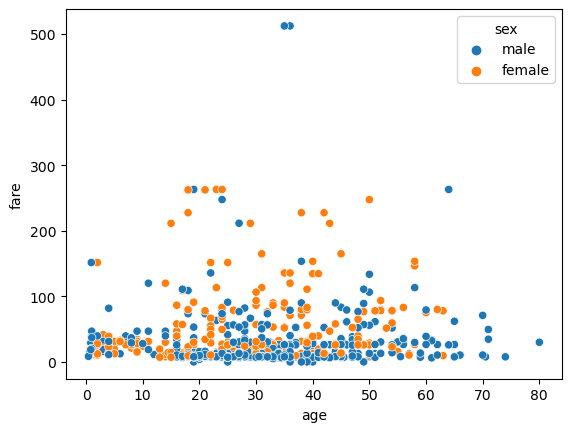

In [13]:
sns.scatterplot(data = df, x = 'age', y = 'fare', hue='sex') # There were 2 males who paid the most

## Plotly

In [14]:
import plotly.express as px

In [15]:
px.scatter(df, x='age', y='fare', color='class')

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Assignment - Visualizing
----

## Univariate analysis

### 1. Survived

In [17]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [18]:
# survival count
survival_counts = df['survived'].value_counts()

mapped_labels = survival_counts.index.map({1:'Survived',0:'Deceased'})


# create a pie chart
fig = px.pie(survival_counts, values=survival_counts.values, 
             names=mapped_labels, color_discrete_sequence=['#e35e46', '#5be83f'])

# Update the labels for clarity
fig.update_layout(title_text='Titanic Survival Rates', title_x=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_color='white')

# Update the labels
fig.show()

In [19]:
px.bar(survival_counts, y=survival_counts.values, x=mapped_labels) #commit

### 2. Pclass

<Axes: xlabel='pclass', ylabel='count'>

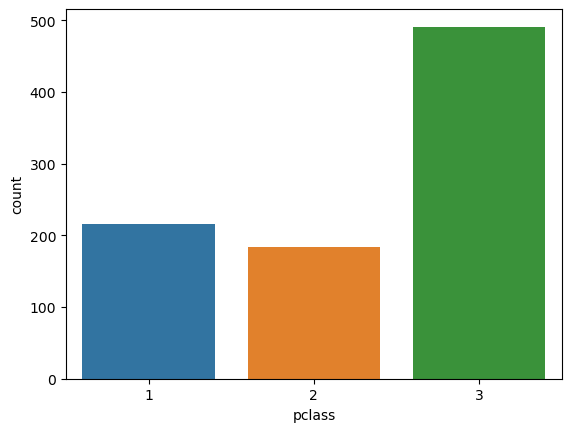

In [20]:
sns.countplot(data=df, x='pclass')

In [21]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [22]:
pclass_value_count = df['pclass'].value_counts()

fig = px.bar(pclass_value_count, x=pclass_value_count.index, y=pclass_value_count.values,
             color=pclass_value_count.index, title='Passenger class distribution on Titanic')
fig.update_layout(xaxis_title='Passenger class', yaxis_title='Count', title_x = 0.5)

### 3. Sex

In [23]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [24]:
sex_valuecount = df['sex'].value_counts()
fig = px.pie(sex_valuecount, values=sex_valuecount.values, names=sex_valuecount.index, 
       color_discrete_sequence=['#5935e8','#ed53c7'], title='Gender distribution on Titanic')

# fig.update_traces(xaxis_title='xyz',yaxis_title='sdsd')
fig.update_traces(textposition='inside',textinfo='label+percent')

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 4. Age

In [26]:
df['age'].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [44]:
fig = px.histogram(df, x='age',
                   nbins=30,
                   marginal='box',
                   color_discrete_sequence=['#636EFA'])

fig.update_layout(
    title='Age distribution on Titanic',
    title_x =0.5,
    xaxis_title='Age',
    yaxis_title='Count',
    bargap=0.2,
    template='plotly_dark'
)

#### **Box plot**

In [28]:
fig = px.box(df, y='age',
             points='all', # Display all points (outliers) alongside the box plot
             notched=True) # Adds a notch to indicate the confidence interval around the median

fig.update_layout(
    title='Age distribution Box plot on the Titanic',
    yaxis_title='Age',
    template='plotly_white'
)

In [29]:
fig = px.violin(df, y='age',
                box=True,
                points='all',
                color_discrete_sequence=['red'])

fig.update_layout(
    title='Age Distribution violin plot',
    yaxis_title='Age',
    template='plotly_white'
)

In [145]:
# Create a histogram with a KDE overlay for the 'Age' column
hist_data = [df['age'].dropna()]  # Drop NaN values for the plot
group_labels = ['age']  # Name of the dataset

fig = ff.create_distplot(hist_data, group_labels, bin_size=5, show_hist=True,
                         show_rug=False)

fig.update_layout(title_text='Distribution of Age in the Titanic Dataset',
                  xaxis_title='Age',
                  yaxis_title='Density',
                  title_x=0.5)
fig.show()

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df_clean = df.dropna(subset='age') # Droping NaN

# Cumulative distribution function
fig = px.ecdf(df_clean, x='age', title='Cumulative distribution function')

fig.update_layout(xaxis_title='Age', yaxis_title='Probability', template='plotly_dark', title_x=0.5)

fig.show()


### 5. Sibsp

In [33]:
df['sibsp'].value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [34]:
sibsp_value_counts = df['sibsp'].value_counts()

# sibsp_value_labels = sibsp_value_counts.index.map({0:'No siblings'})

fig = px.pie(sibsp_value_counts,
       values=sibsp_value_counts.values,
       names=sibsp_value_counts.index)

# fig.update_traces(textposition='inside')
# fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text='Sibsp distribution', title_x=0.5)
fig.show()

In [35]:
fig = px.bar(sibsp_value_counts,
             x=sibsp_value_counts.index,
             y=sibsp_value_counts.values)

fig.update_layout(title='Sibsp distribution',
                  title_x=0.5,
                  xaxis_title='Sibsp category',
                  yaxis_title='Count')

fig.show()


In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Parch column univariate analysis

In [37]:
df['parch'].value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

### Pie chart

In [38]:
parch_value_counts = df['parch'].value_counts()

fig = px.pie(parch_value_counts,
             parch_value_counts.values,
             parch_value_counts.index)

fig.update_layout(title='Pie chart for Parch', title_x=0.5 )

### Bar chart

In [39]:
fig = px.bar(parch_value_counts, x=parch_value_counts.index, y=parch_value_counts.values)

fig.update_layout(title='Bar chart parch',
                  xaxis_title='Parch Category',
                  yaxis_title='Parch count',
                  template='plotly_dark')
fig.show()

### Histogram

In [60]:
fig = px.histogram(df,
                   x='parch',
                   nbins=10,
                   marginal='box')

fig.update_layout(title='Parch Distribution',
                  xaxis_title='Parch',
                  bargap =0.1,
                  template='plotly')

In [61]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [62]:
df['fare'].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [73]:
fig = px.histogram(df,
                   x='fare',
                   nbins=20,
                   marginal='box')

fig.update_layout(title='Fare distribution',
                  title_x=0.5,
                  xaxis_title='fare',
                  bargap=0.1)

In [77]:
fig = ff.create_distplot([df['fare'].dropna()], ['fare'], bin_size=5,
                         show_hist=True, show_rug=False)
fig.show()

<Axes: xlabel='fare', ylabel='Density'>

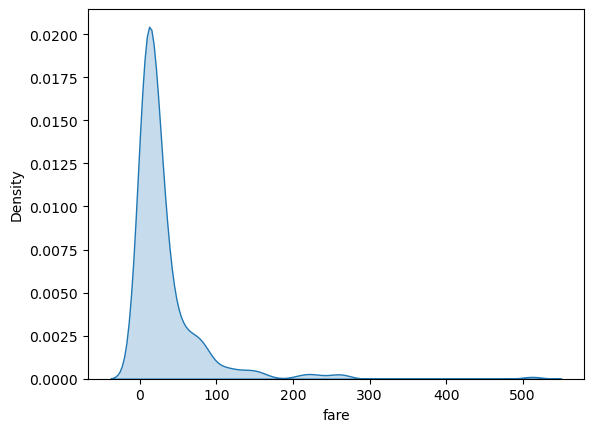

In [81]:
sns.kdeplot(df['fare'], fill=True)

In [85]:
fig = ff.create_distplot([df['fare'].dropna()], ['fare'], bin_size=5,
                         show_hist=False, show_rug=False)

fig.update_layout(title='fare distribution',
                  title_x=0.5,
                  template='plotly_dark')
fig.show()

In [87]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [91]:
embarked_counts = df['embark_town'].value_counts()
fig = px.pie(embarked_counts,
             names=embarked_counts.index,
             values=embarked_counts.values)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [93]:
class_counts = df['class'].value_counts()
fig = px.pie(class_counts,
             names=class_counts.index,
             values=class_counts.values)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

## Bivariate analysis

In [94]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

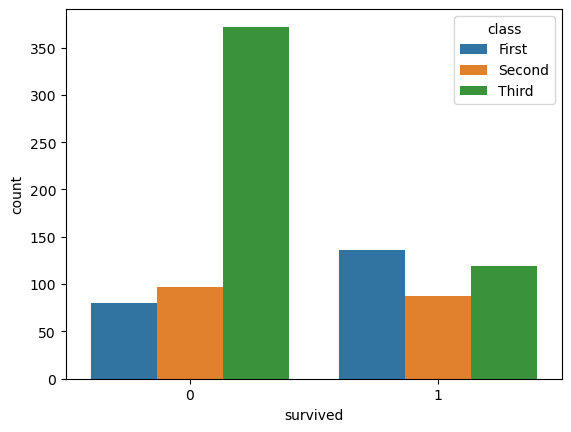

In [100]:
# Visualize survived with pclass
sns.countplot(data=df, x='survived', hue='class')

In [107]:
fig = px.histogram(df, x='survived', color='class', barmode='group')

fig.update_layout(title='Survival according to class',
                  title_x=0.5,
                  template='plotly_dark')
fig.show()

In [114]:
fig = px.histogram(df, x='survived', color='sex', barmode='group')

fig.update_layout(title='Survival according to Sex', title_x=0.5)

fig.show()

In [116]:
fig = px.histogram(df, x='embark_town', color='class')

fig.update_layout(title='Socio-Economic Distribution of Titanic Passengers by Embarkation Town and Class',
                  title_x=0.5)

fig.show()

In [117]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [122]:
# Average fare paid by sex plotly visualization bar plot

fig = px.bar(df.groupby('sex')['fare'].mean().reset_index(), x='sex', y='fare', title='Average Fare Paid by Sex')
fig.update_layout(xaxis_title='Sex', yaxis_title='Average Fare', title_x=0.5, template='plotly_dark')
fig.show()


In [123]:
# KDE plot for fare according to class
fig = px.histogram(df, x='fare', color='class', marginal='box', nbins=20)
fig.update_layout(title='Fare distribution by class', title_x=0.5, bargap=0.1)
fig.show()

<Axes: xlabel='age', ylabel='Density'>

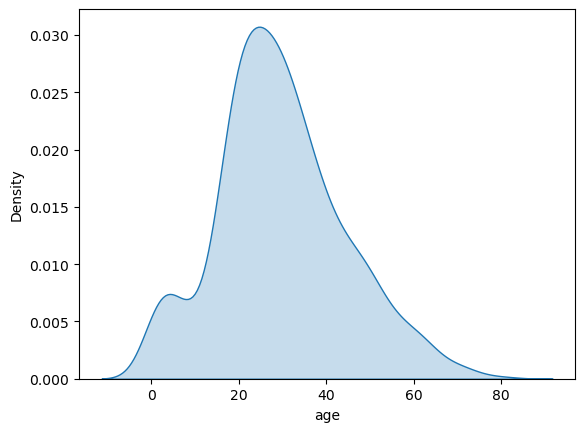

In [134]:
sns.kdeplot(df['age'], fill=True)

In [135]:
# Create density contour plot
fig = px.density_contour(df, x='age', title='Kernel Density Estimation of Age', 
                          labels={'age': 'Age'})

# Show the plot
fig.show()

In [143]:
# Create density heatmap
fig = px.density_heatmap(df, x='age', title='Kernel Density Estimation of Age',
                          labels={'age': 'Passenger Age', 'index': 'Kernel Density Estimation'})

fig.update_layout(title_x=0.5)

fig.show()


In [146]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [147]:
fig = px.histogram(df, x='sex', color='alone')

fig.show()

### Relation between Fare and Survival

In [153]:

fig = px.density_heatmap(df, x='fare', y='alive')

fig.show()

In [154]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64